#実力テスト - データサイエンスセクション

マーケティングプロモーションのコンバージョンの有無のデータセットがあります。

次回同様のプロモーションを行う場合には、全顧客に対して行うのではなく、データからコンバージョンの確度の高いユーザーに対してのみプロモーションを打つことを考えています。

今回の課題では、どういったユーザーに対してプロモーション施策を打つことが望ましいか分析、得られた示唆をまとめて報告してください。

#手順の実行

1.   データの確認

*   データの確認
*   基礎統計量の確認（平均・分散・標準偏差）

2.   データの比較

*   データの可視化（棒グラフ・ヒストグラム・散布図・箱ひげ図等）
*   クロス集計（2変数を集計・比較し、特徴を捉える）
*   検定（buy one get oneとコンバージョンの差に有意性はあるか？等）


3.   要因の分析

*   相関係数（どの項目がコンバージョンに影響を与えているか？）
*   重回帰分析（項目全体で見て、どのような影響があるか？等）

*   分類手法を使用した係数比較

※大まかな手順

・代表値の比較

・相関分析と重回帰分析による要因の特定

・クラスタリングよる対象の絞り込みと比較

・主成分分析による可視化

・クラスタの代表値の比較による要因の特定と施策の考案

# 環境構築

In [ ]:
# 環境の準備 : 実行してください
!pip install -q japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 66.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
# 環境の準備 : 実行してください
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import japanize_matplotlib
from scipy import stats
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh')

plt.rcParams['figure.figsize'] = 10, 8

In [ ]:
# 環境の準備 : exercise.csv をアップロードして実行してください
import pandas as pd
df = pd.read_csv('/content/exercise.csv')

# データの確認



*   数値（代表値）の確認
*   可視化
*クロス集計



In [ ]:
#データの確認
df.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0


In [ ]:
#データの確認（欠損・データ型）
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   recency        64000 non-null  int64  
 1   history        64000 non-null  float64
 2   used_discount  64000 non-null  int64  
 3   used_bogo      64000 non-null  int64  
 4   zip_code       64000 non-null  object 
 5   is_referral    64000 non-null  int64  
 6   channel        64000 non-null  object 
 7   offer          64000 non-null  object 
 8   conversion     64000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 4.4+ MB


In [ ]:
df.describe(include="all")

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
count,64000.000000,64000.000000,64000.000000,64000.000000,64000,64000.000000,64000,64000,64000.000000
unique,NaN,NaN,NaN,NaN,3,NaN,3,3,NaN
top,NaN,NaN,NaN,NaN,Surburban,NaN,Web,Buy One Get One,NaN
freq,NaN,NaN,NaN,NaN,28776,NaN,28217,21387,NaN
mean,5.763734,242.085656,0.551031,0.549719,NaN,0.502250,NaN,NaN,0.146781
std,3.507592,256.158608,0.497393,0.497526,NaN,0.499999,NaN,NaN,0.353890
min,1.000000,29.990000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000
25%,2.000000,64.660000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000
50%,6.000000,158.110000,1.000000,1.000000,NaN,1.000000,NaN,NaN,0.000000
75%,9.000000,325.657500,1.000000,1.000000,NaN,1.000000,NaN,NaN,0.000000


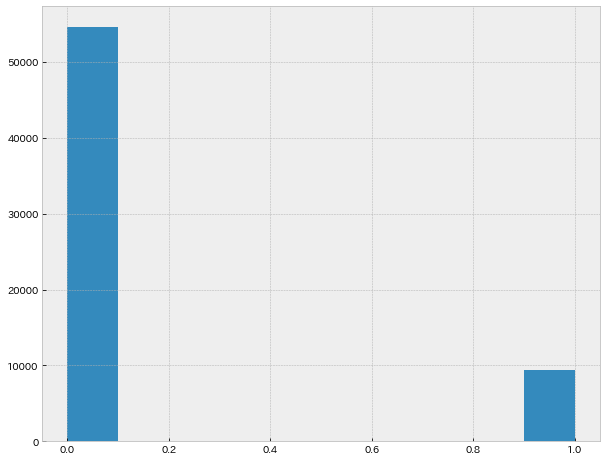

In [ ]:
df["conversion"].hist();

In [ ]:
df["conversion"].value_counts(normalize=True)

0    0.853219
1    0.146781
Name: conversion, dtype: float64

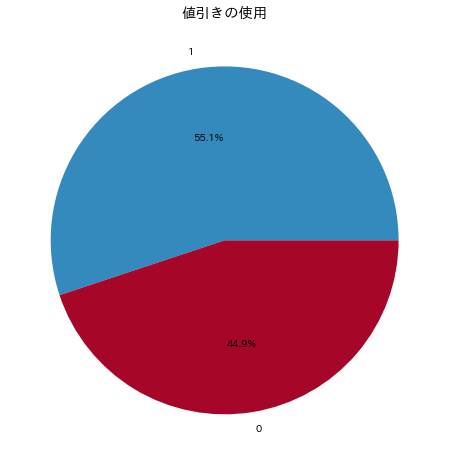

In [ ]:
x1=df["used_discount"].value_counts()

plt.title("値引きの使用")
plt.pie(x1, labels=x1.index, autopct="%.1f%%");

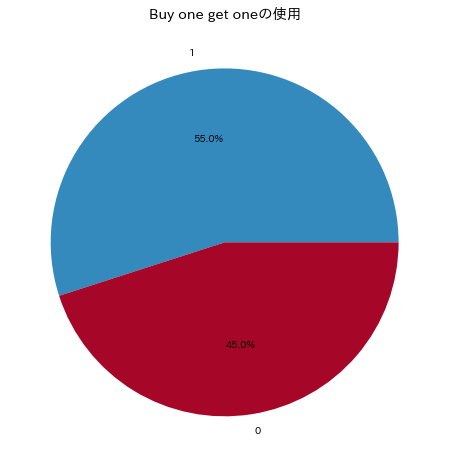

In [ ]:
x2=df["used_bogo"].value_counts()

plt.title("Buy one get oneの使用")
plt.pie(x2, labels=x2.index, autopct="%.1f%%");

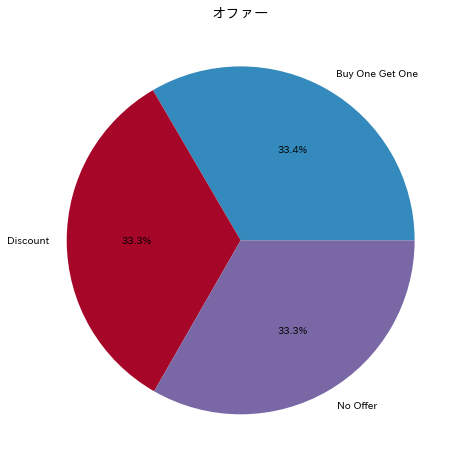

In [ ]:
x3=df["offer"].value_counts()

plt.title("オファー")
plt.pie(x3, labels=x3.index, autopct="%.1f%%");

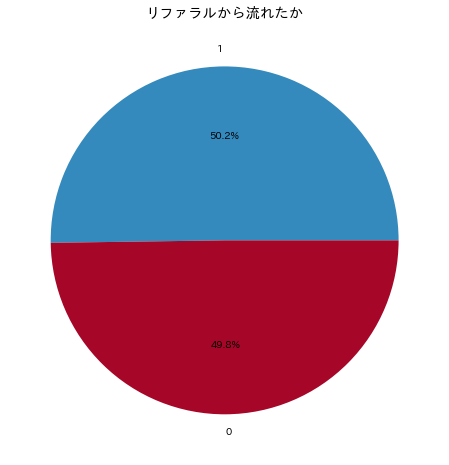

In [ ]:
x4=df["is_referral"].value_counts()

plt.title("リファラルから流れたか")
plt.pie(x4, labels=x4.index, autopct="%.1f%%");

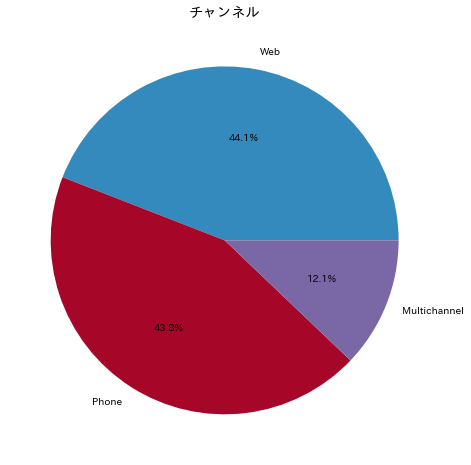

In [ ]:
x5=df["channel"].value_counts()

plt.title("チャンネル")
plt.pie(x5, labels=x5.index, autopct="%.1f%%");

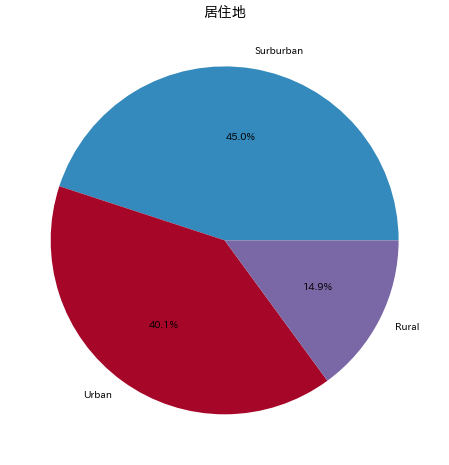

In [ ]:
x6=df["zip_code"].value_counts()

plt.title("居住地")
plt.pie(x6, labels=x6.index, autopct="%.1f%%");

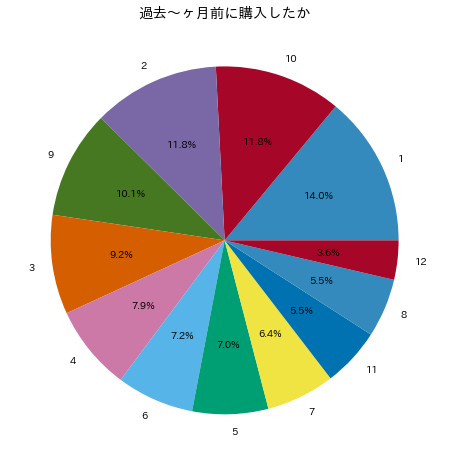

In [ ]:
x7=df["recency"].value_counts()

plt.title("過去～ヶ月前に購入したか")
plt.pie(x7, labels=x7.index, autopct="%.1f%%");

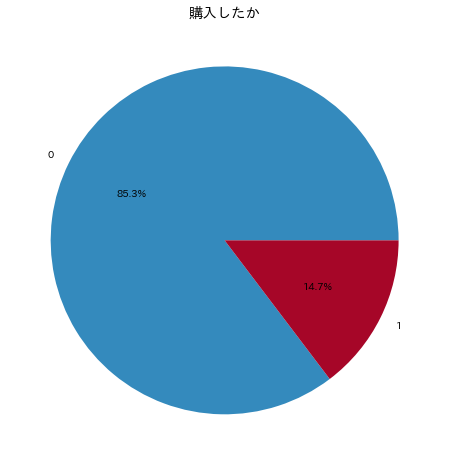

In [ ]:
x9=df["conversion"].value_counts()

plt.title("購入したか")
plt.pie(x9, labels=x9.index, autopct="%.1f%%");

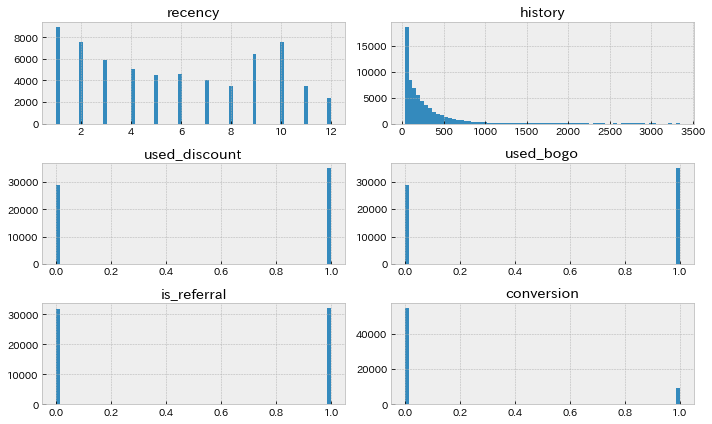

In [ ]:
plt.rcParams["figure.figsize"]=10,6

df.hist(bins=70);
plt.tight_layout();

In [ ]:
#クロス集計（オファーのうち、購入してくれた割合）
pd.crosstab(df["offer"],df["conversion"])

conversion,0,1
offer,,
Buy One Get One,18149,3238
Discount,17413,3894
No Offer,19044,2262


In [ ]:
#クロス集計（オファーのうち、過去～ヶ月に買ったかの割合）
pd.crosstab(df["recency"],df["offer"])

offer,Buy One Get One,Discount,No Offer
recency,,,
1,3018,2963,2971
2,2463,2543,2531
3,2005,1963,1936
4,1671,1685,1721
5,1525,1468,1517
6,1557,1520,1528
7,1358,1311,1409
8,1158,1173,1164
9,2111,2204,2126


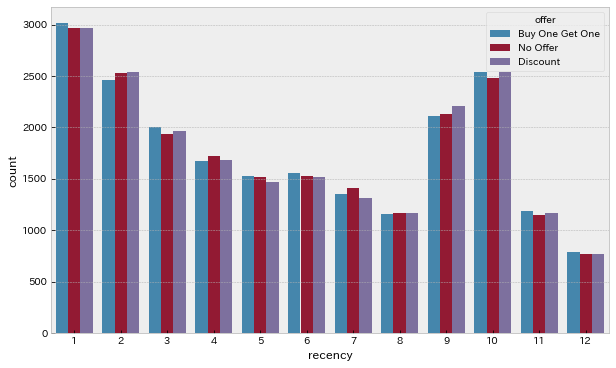

In [ ]:
sns.countplot(x="recency",hue="offer",data=df);

In [ ]:
recency_group = df.groupby("recency")
recency_group.mean()

,history,used_discount,used_bogo,is_referral,conversion
recency,,,,,
1,359.844955,0.572498,0.578195,0.554178,0.193029
2,310.990777,0.574764,0.555924,0.532440,0.177790
3,274.462007,0.557419,0.560976,0.518631,0.166328
4,251.310701,0.545007,0.559779,0.508568,0.148907
5,233.153233,0.549446,0.554545,0.490022,0.142350
6,218.387238,0.558523,0.538111,0.479045,0.140717
7,207.557580,0.553948,0.531633,0.480873,0.133889
8,194.924066,0.551645,0.529900,0.483548,0.127897
9,185.874574,0.534389,0.536563,0.478031,0.113957


In [ ]:
recency_group.median()

,history,used_discount,used_bogo,is_referral,conversion
recency,,,,,
1,252.960,1.0,1.0,1.0,0.0
2,211.390,1.0,1.0,1.0,0.0
3,187.485,1.0,1.0,1.0,0.0
4,172.220,1.0,1.0,1.0,0.0
5,155.865,1.0,1.0,0.0,0.0
6,145.720,1.0,1.0,0.0,0.0
7,143.435,1.0,1.0,0.0,0.0
8,132.920,1.0,1.0,0.0,0.0
9,128.140,1.0,1.0,0.0,0.0


In [ ]:
#historyは分散が激しいため、参考にしないこと。
offer_group = df.groupby("offer")
offer_group.mean()

,recency,history,used_discount,used_bogo,is_referral,conversion
offer,,,,,,
Buy One Get One,5.767850,242.536633,0.548932,0.550101,0.503250,0.151400
Discount,5.773642,242.835931,0.550946,0.551415,0.501525,0.182757
No Offer,5.749695,240.882653,0.553224,0.547639,0.501971,0.106167


In [ ]:
#中央値のため、historyを参考にしやすい。
offer_group.median()

,recency,history,used_discount,used_bogo,is_referral,conversion
offer,,,,,,
Buy One Get One,6.0,160.090,1.0,1.0,1.0,0.0
Discount,6.0,157.220,1.0,1.0,1.0,0.0
No Offer,5.0,156.655,1.0,1.0,1.0,0.0


# 検定




*   χ二乗検定
*   t検定





・χ二乗検定について

① 仮説を立てる

帰無仮説（H_0）：二つの変数は独立である。

対立仮説（H_1）：二つの変数は独立ではない（何らかの関連がある。）

② 有意水準を決める

今回は有意水準を 5% とします。

③ p 値を計算する

#仮説1："conversion"と"used_discount"に関連性はあるか？

In [ ]:
crosstab1 = pd.crosstab(df["conversion"], df["used_discount"])
crosstab1

used_discount,0,1
conversion,,
0,24592,30014
1,4142,5252


In [ ]:
#χ二乗検定
chi2, p, dof, ef = stats.chi2_contingency(crosstab1, correction= False)
p

0.08950487803670254

・判定

p値が有意水準を上回ったため、「convensionと以前割引を使ったかは、関係なし」

#仮説2："convension"と"used_bogo"に関連性があるか？

In [ ]:
crosstab2 = pd.crosstab(df["conversion"], df["used_bogo"])
crosstab2

used_bogo,0,1
conversion,,
0,25174,29432
1,3644,5750


In [ ]:
#χ二乗検定
chi2, p, dof, ef = stats.chi2_contingency(crosstab2, correction= False)
p

1.595298975970467e-39

・判定

p値が有意水準を上回ったため、「convensionと以前bogoを使ったかは、関係なし」

#仮説3："offer"は"conversion"と関連性があるか？

In [ ]:
crosstab3 = pd.crosstab(df["conversion"], df["offer"])
crosstab3

offer,Buy One Get One,Discount,No Offer
conversion,,,
0,18149,17413,19044
1,3238,3894,2262


In [ ]:
#χ二乗検定
chi2, p, dof, ef = stats.chi2_contingency(crosstab3, correction= False)
p

2.869178384267155e-110

・判定結果

p値が有意水準を下回ったため、「convensionとofferは、関係あり」

#仮説4：各"offer"の"history"の平均の差はそれぞれ有意な差があるか？

In [ ]:
group_o = df.groupby("offer")
group_o["history"].agg(["mean","median"])

,mean,median
offer,,
Buy One Get One,242.536633,160.090
Discount,242.835931,157.220
No Offer,240.882653,156.655


In [ ]:
group1 = group_o.get_group("Buy One Get One")
group2 = group_o.get_group("Discount")
group3 = group_o.get_group("No Offer")

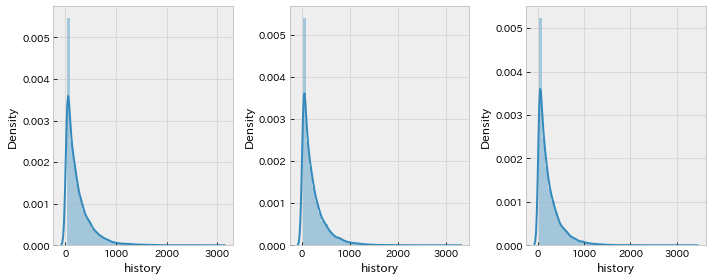

In [ ]:
# 分布の確認
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
sns.distplot(group1["history"])
plt.subplot(1, 3, 2)
sns.distplot(group2["history"])
plt.subplot(1, 3, 3)
sns.distplot(group3["history"])
plt.tight_layout()

In [ ]:
# コルモゴロフ・スミルノフ検定
stats.kstest(group1['history'],"norm")

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=29.99, statistic_sign=-1)

In [ ]:
stats.kstest(group2['history'],"norm")

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=29.99, statistic_sign=-1)

In [ ]:
stats.kstest(group3['history'],"norm")

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=29.99, statistic_sign=-1)

・判定結果

p値が有意水準を下回ったため、「過去に購入した商品価値」と「各オファー」は正規分布である

今回はどちらのデータも正規分布を仮定できました。よって、パラメトリック検定を使用します。

また、今回は対応がないデータとして扱います。

よって、F検定（分散の検定）を行う。

①仮説立て

帰無仮説：すべての群に対し母分散が等しい

対立仮説：いずれかの母分散が異なる

②有意水準

今回は5％とする

③p値を調べる

In [ ]:
#F検定の関数を作成

def ftest(asample, bsample):
    a_var = np.var(asample, ddof=1)  # Aの不偏分散
    b_var = np.var(bsample, ddof=1)  # Bの不偏分散
    a_df = len(asample) - 1  # Aの自由度
    b_df = len(bsample) - 1  # Bの自由度
    f = a_var / b_var  # F比の値

    one_sided_pval1 = stats.f.cdf(f, a_df, b_df)  # 片側検定のp値 1
    one_sided_pval2 = stats.f.sf(f, a_df, b_df)   # 片側検定のp値 2
    two_sided_pval = min(one_sided_pval1, one_sided_pval2) * 2  # 両側検定のp値

    print('F:       ', f)
    print('p-value: ', two_sided_pval)

In [ ]:
ftest(group1["history"], group2["history"])

F:        0.9617880063134971
p-value:  0.004426042635308778


In [ ]:
ftest(group1["history"], group3["history"])

F:        1.0206285624166809
p-value:  0.13581900228951724


In [ ]:
ftest(group3["history"], group2["history"])

F:        0.942348707188971
p-value:  1.4689447716131695e-05


・判定結果

group1 and group2 ->母分散が異なる

group1 and group3 ->母分散が等しい

group2 and group3 ->母分散が異なる

　① 仮説を立てる

仮説は以下のように立てます。

・帰無仮説（H0）: 2 群間の平均値に差がない（$\mu{diff} = 0
\mu{1} = \mu{2}$）

・対立仮説（H1）: 2 群間の平均値に差がある（$\mu{diff} ≠ 0
\mu{1} ≠ \mu{2}$）

上記のように、帰無仮説を H0
、対立仮説を H1
 と表します。

　② 有意水準を決める

今回は有意水準を 5% とします。

　③ p 値を計算する

group1 and group2 ->母分散が異なるため、equal_var=False

group1 and group3 ->母分散が等しいため、equal_var=True

group2 and group3 ->母分散が異なるため、equal_var=False

上記全て正規分布

In [ ]:
stats.ttest_ind(group1["history"],group2["history"], equal_var=False)

Ttest_indResult(statistic=-0.11991393241776856, pvalue=0.904551892208411)

In [ ]:
stats.ttest_ind(group1["history"],group3["history"], equal_var=True)

Ttest_indResult(statistic=0.6726242731293037, pvalue=0.5011899958704396)

In [ ]:
stats.ttest_ind(group2["history"],group3["history"], equal_var=False)

Ttest_indResult(statistic=0.7857592973724927, pvalue=0.43201288940480775)

・判定結果

いずれのp値も有意水準を上回ったため、いずれも有意な差はあるか不明。

#仮説5：各"offer"の"conversion"の平均の差はそれぞれ有意な差があるか？

In [ ]:
group_o = df.groupby("offer")
group_o["conversion"].agg(["mean","median"])

,mean,median
offer,,
Buy One Get One,0.151400,0.0
Discount,0.182757,0.0
No Offer,0.106167,0.0


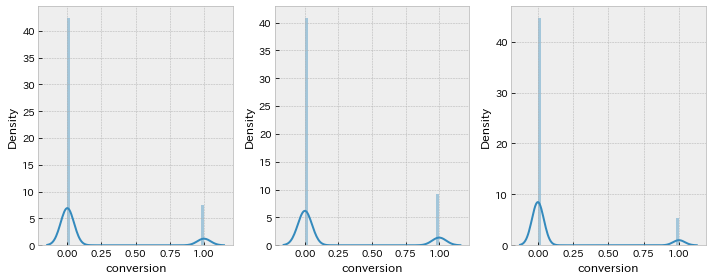

In [ ]:
# 分布の確認
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
sns.distplot(group1["conversion"])
plt.subplot(1, 3, 2)
sns.distplot(group2["conversion"])
plt.subplot(1, 3, 3)
sns.distplot(group3["conversion"])
plt.tight_layout()

In [ ]:
# コルモゴロフ・スミルノフ検定
stats.kstest(group1['conversion'],"norm")

KstestResult(statistic=0.5, pvalue=0.0, statistic_location=0, statistic_sign=-1)

In [ ]:
stats.kstest(group2['conversion'],"norm")

KstestResult(statistic=0.5, pvalue=0.0, statistic_location=0, statistic_sign=-1)

In [ ]:
stats.kstest(group3['conversion'],"norm")

KstestResult(statistic=0.5, pvalue=0.0, statistic_location=0, statistic_sign=-1)

・判定結果

p値が有意水準を下回ったため、「コンバージョン」と「各オファー」は正規分布である

今回はどちらのデータも正規分布を仮定できました。よって、パラメトリック検定を使用します。

また、今回は対応がないデータとして扱います。

よって、F検定（分散の検定）を行う。

①仮説立て

帰無仮説：すべての群に対し母分散が等しい

対立仮説：いずれかの母分散が異なる

②有意水準

今回は5％とする

③p値を調べる

In [ ]:
ftest(group1["conversion"], group2["conversion"])

F:        0.8602106091607267
p-value:  4.033952341102046e-28


In [ ]:
ftest(group1["conversion"], group3["conversion"])

F:        1.3538881933494609
p-value:  4.0896943588288515e-108


In [ ]:
ftest(group3["conversion"], group2["conversion"])

F:        0.6353631070765178
p-value:  2.9494652016750963e-238


・判定結果

group1 and group2 ->母分散が異なる

group1 and group3 ->母分散が異なる

group2 and group3 ->母分散が異なる

　① 仮説を立てる

仮説は以下のように立てます。

・帰無仮説（H0）: 2 群間の平均値に差がない（ μdiff=0μ1=μ2 ）

・対立仮説（H1）: 2 群間の平均値に差がある（ μdiff≠0μ1≠μ2 ）

上記のように、帰無仮説を H0 、対立仮説を H1 と表します。

　② 有意水準を決める

今回は有意水準を 5% とします。

　③ p 値を計算する

上記全て正規分布且つ分散が異なる

In [ ]:
stats.ttest_ind(group1["conversion"],group2["conversion"], equal_var=False)

Ttest_indResult(statistic=-8.690812025706625, pvalue=3.724744372968098e-18)

In [ ]:
stats.ttest_ind(group1["conversion"],group3["conversion"], equal_var=False)

Ttest_indResult(statistic=13.9847384824106, pvalue=2.432447702312722e-44)

In [ ]:
stats.ttest_ind(group3["conversion"],group2["conversion"], equal_var=False)

Ttest_indResult(statistic=-22.620230766723257, pvalue=1.3644511962742709e-112)

・判定結果

いずれのp値も有意水準を下回ったため、いずれも有意な差がある。

->つまり、offer次第でconvensionを向上できる。

#仮説6："zip_code"は"conversion"と関連性があるか？

In [ ]:
crosstab4 = pd.crosstab(df["conversion"], df["zip_code"])
crosstab4

zip_code,Rural,Surburban,Urban
conversion,,,
0,7764,24749,22093
1,1799,4027,3568


In [ ]:
#χ二乗検定
chi2, p, dof, ef = stats.chi2_contingency(crosstab4, correction= False)
p

4.636935563366961e-34

・判定結果

p値が有意水準を下回ったため、「convensionとzip_codeは、関係あり」

#仮説7：各"zip_code"の"history"の平均の差はそれぞれ有意な差があるか？

In [ ]:
group_z = df.groupby("zip_code")
group_z["history"].agg(["mean","median"])

,mean,median
zip_code,,
Rural,242.853935,159.58
Surburban,240.488905,155.52
Urban,243.589924,160.28


In [ ]:
group4 = group_z.get_group("Rural")
group5 = group_z.get_group("Surburban")
group6 = group_z.get_group("Urban")

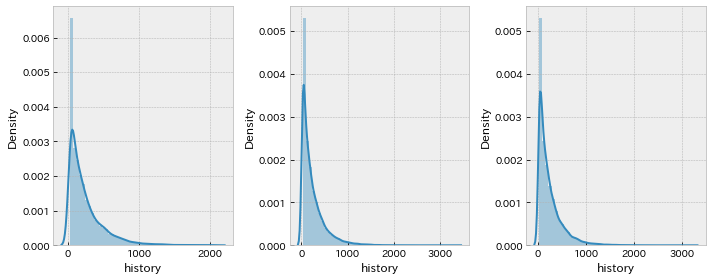

In [ ]:
# 分布の確認
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
sns.distplot(group4["history"])
plt.subplot(1, 3, 2)
sns.distplot(group5["history"])
plt.subplot(1, 3, 3)
sns.distplot(group6["history"])
plt.tight_layout()

In [ ]:
# コルモゴロフ・スミルノフ検定
stats.kstest(group4['history'],"norm")

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=29.99, statistic_sign=-1)

In [ ]:
stats.kstest(group5['history'],"norm")

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=29.99, statistic_sign=-1)

In [ ]:
stats.kstest(group6['history'],"norm")

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=29.99, statistic_sign=-1)

・判定結果

p値が有意水準を下回ったため、「過去に購入した商品価値」と「各オファー」は正規分布である

今回はどちらのデータも正規分布を仮定できました。よって、パラメトリック検定を使用します。

また、今回は対応がないデータとして扱います。

よって、F検定（分散の検定）を行う。

①仮説立て

帰無仮説：すべての群に対し母分散が等しい

対立仮説：いずれかの母分散が異なる

②有意水準

今回は5％とする

③p値を調べる

In [ ]:
ftest(group4["history"], group5["history"])

F:        0.9839955734458912
p-value:  0.3358582513184365


In [ ]:
ftest(group4["history"], group6["history"])

F:        0.9648447117174097
p-value:  0.03540260818909474


In [ ]:
ftest(group5["history"], group6["history"])

F:        0.9805376545938959
p-value:  0.1054254891451369


・判定結果

group4 and group5 ->母分散が等しい

group4 and group6 ->母分散が異なる

group5 and group6 ->母分散が等しい

　① 仮説を立てる

仮説は以下のように立てます。

・帰無仮説（H0）: 2 群間の平均値に差がない（ μdiff=0μ1=μ2 ）

・対立仮説（H1）: 2 群間の平均値に差がある（ μdiff≠0μ1≠μ2 ）

上記のように、帰無仮説を H0 、対立仮説を H1 と表します。

　② 有意水準を決める

今回は有意水準を 5% とします。

　③ p 値を計算する

group1 and group2 ->母分散が等しいため、equal_var=True

group1 and group3 ->母分散が異なるため、equal_var=False

group2 and group3 ->母分散が等しいため、equal_var=True

上記全て正規分布

In [ ]:
stats.ttest_ind(group4["history"],group5["history"], equal_var=True)

Ttest_indResult(statistic=0.7859481940557673, pvalue=0.4319026959182021)

In [ ]:
stats.ttest_ind(group4["history"],group6["history"], equal_var=False)

Ttest_indResult(statistic=-0.2412397902742852, pvalue=0.8093721145435462)

In [ ]:
stats.ttest_ind(group6["history"],group5["history"], equal_var=True)

Ttest_indResult(statistic=1.4072911645731307, pvalue=0.1593467779272435)

・判定結果

いずれのp値も有意水準を上回ったため、いずれも有意な差はあるか不明。

#仮説8：各"zip_code"の"conversion"の平均の差はそれぞれ有意な差があるか？

In [ ]:
group_z = df.groupby("zip_code")
group_z["conversion"].agg(["mean","median"])

,mean,median
zip_code,,
Rural,0.188121,0.0
Surburban,0.139943,0.0
Urban,0.139044,0.0


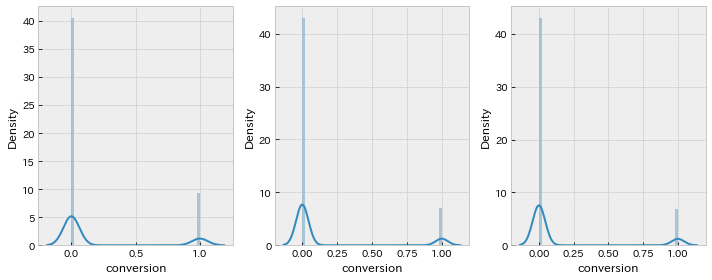

In [ ]:
# 分布の確認
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
sns.distplot(group4["conversion"])
plt.subplot(1, 3, 2)
sns.distplot(group5["conversion"])
plt.subplot(1, 3, 3)
sns.distplot(group6["conversion"])
plt.tight_layout()

In [ ]:
# コルモゴロフ・スミルノフ検定
stats.kstest(group4['conversion'],"norm")

KstestResult(statistic=0.5, pvalue=0.0, statistic_location=0, statistic_sign=-1)

In [ ]:
stats.kstest(group5['conversion'],"norm")

KstestResult(statistic=0.5, pvalue=0.0, statistic_location=0, statistic_sign=-1)

In [ ]:
stats.kstest(group6['conversion'],"norm")

KstestResult(statistic=0.5, pvalue=0.0, statistic_location=0, statistic_sign=-1)

・判定結果

p値が有意水準を下回ったため、「コンバージョン」と「各居住地」は正規分布である

今回はどちらのデータも正規分布を仮定できました。よって、パラメトリック検定を使用します。

また、今回は対応がないデータとして扱います。

よって、F検定（分散の検定）を行う。

①仮説立て

帰無仮説：すべての群に対し母分散が等しい

対立仮説：いずれかの母分散が異なる

②有意水準

今回は5％とする

③p値を調べる

In [ ]:
ftest(group4["conversion"], group5["conversion"])

F:        1.2690544805393
p-value:  5.64691056508349e-48


In [ ]:
ftest(group4["conversion"], group6["conversion"])

F:        1.2759230564212707
p-value:  1.5602107613940603e-48


In [ ]:
ftest(group6["conversion"], group5["conversion"])

F:        0.9946167789292594
p-value:  0.656850559651216


・判定結果

group4 and group5 ->母分散が異なる

group4 and group6 ->母分散が異なる

group5 and group6 ->母分散が全て等しい


　① 仮説を立てる

仮説は以下のように立てます。

・帰無仮説（H0）: 2 群間の平均値に差がない（ μdiff=0μ1=μ2 ）

・対立仮説（H1）: 2 群間の平均値に差がある（ μdiff≠0μ1≠μ2 ）

上記のように、帰無仮説を H0 、対立仮説を H1 と表します。

　② 有意水準を決める

今回は有意水準を 5% とします。

　③ p 値を計算する

group4 and group5 ->母分散が異なるため、equal_var=False

group4 and group6 ->母分散が異なるため、equal_var=False

group5 and group6 ->母分散が全て等しいため、equal_var=True

上記全て正規分布

In [ ]:
stats.ttest_ind(group4["conversion"],group5["conversion"], equal_var=False)

Ttest_indResult(statistic=10.731260704854524, pvalue=9.09546267379394e-27)

In [ ]:
stats.ttest_ind(group4["conversion"],group6["conversion"], equal_var=False)

Ttest_indResult(statistic=10.803037441849728, pvalue=4.160785680807365e-27)

In [ ]:
stats.ttest_ind(group6["conversion"],group5["conversion"], equal_var=True)

Ttest_indResult(statistic=-0.3022912805319444, pvalue=0.7624311796816869)

・判定結果

group4 and group5, group4 and group6 のp値は有意水準を下回ったため、有意な差がある。

しかし、group5 and group6 のp値は有意水準を上回ったため、有意な差があるか不明。

->つまり、zip_codeは「都市」と「田舎」、「郊外」と「田舎」で差があるため、convensionを向上できる。

　しかし、「郊外」と「都市」は関係がない。

#仮説9："channel"は"conversion"と関連性があるか？

In [ ]:
crosstab5 = pd.crosstab(df["conversion"], df["channel"])
crosstab5

channel,Multichannel,Phone,Web
conversion,,,
0,6429,24458,23719
1,1333,3563,4498


In [ ]:
#χ二乗検定
chi2, p, dof, ef = stats.chi2_contingency(crosstab5, correction= False)
p

1.2736921440078863e-35

・判定結果

p値が有意水準を下回ったため、「convensionとchannelは、関係あり」

#仮説10：各"channel"は"history"の平均の差はそれぞれ有意な差があるか？

In [ ]:
group_c = df.groupby("channel")
group_c["history"].agg(["mean","median"])

,mean,median
channel,,
Multichannel,520.970370,450.11
Phone,202.807184,131.39
Web,204.375017,131.68


In [ ]:
group7 = group_c.get_group("Multichannel")
group8 = group_c.get_group("Phone")
group9 = group_c.get_group("Web")

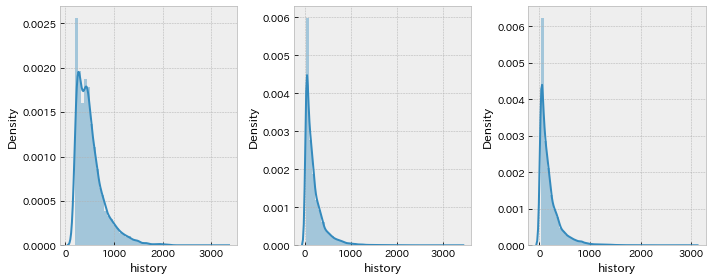

In [ ]:
# 分布の確認
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
sns.distplot(group7["history"])
plt.subplot(1, 3, 2)
sns.distplot(group8["history"])
plt.subplot(1, 3, 3)
sns.distplot(group9["history"])
plt.tight_layout()

In [ ]:
# コルモゴロフ・スミルノフ検定
stats.kstest(group7['history'],"norm")

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=200.02, statistic_sign=-1)

In [ ]:
stats.kstest(group8['history'],"norm")

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=29.99, statistic_sign=-1)

In [ ]:
stats.kstest(group9['history'],"norm")

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=29.99, statistic_sign=-1)

・判定結果

p値が有意水準を下回ったため、「過去に購入した商品価値」と「各オファー」は正規分布である

今回はどちらのデータも正規分布を仮定できました。よって、パラメトリック検定を使用します。

また、今回は対応がないデータとして扱います。

よって、F検定（分散の検定）を行う。

①仮説立て

帰無仮説：すべての群に対し母分散が等しい

対立仮説：いずれかの母分散が異なる

②有意水準

今回は5％とする

③p値を調べる

In [ ]:
ftest(group7["history"], group8["history"])

F:        1.739079085529582
p-value:  4.618514189856614e-225


In [ ]:
ftest(group7["history"], group9["history"])

F:        1.6938490865776847
p-value:  7.120995183178586e-204


In [ ]:
ftest(group9["history"], group8["history"])

F:        1.0267024962910252
p-value:  0.02715294679272086


・判定結果

group7 and group8 ->母分散が異なる

group7 and group9 ->母分散が異なる

group8 and group9 ->母分散が異なる

　① 仮説を立てる

仮説は以下のように立てます。

・帰無仮説（H0）: 2 群間の平均値に差がない（ μdiff=0μ1=μ2 ）

・対立仮説（H1）: 2 群間の平均値に差がある（ μdiff≠0μ1≠μ2 ）

上記のように、帰無仮説を H0 、対立仮説を H1 と表します。

　② 有意水準を決める

今回は有意水準を 5% とします。

　③ p 値を計算する


上記全て正規分布且つ母分散が異なる

In [ ]:
stats.ttest_ind(group7["history"],group8["history"], equal_var=False)

Ttest_indResult(statistic=88.43709606317316, pvalue=0.0)

In [ ]:
stats.ttest_ind(group7["history"],group9["history"], equal_var=False)

Ttest_indResult(statistic=87.88321943100564, pvalue=0.0)

In [ ]:
stats.ttest_ind(group9["history"],group8["history"], equal_var=False)

Ttest_indResult(statistic=0.8273021764199011, pvalue=0.4080693210548082)

・判定結果

group7 and group8, group7 and group9のp値は有意水準を上回ったため、有意な差はある。

しかし、group8 and group9 のp値は有意水準を下回ったため、有意な差があるかは不明。

->つまり、Multichannel と Web、Multichannel と Phoneでは購入した商品価値について何かしら関係がある。

　しかし、Phone と Web では不明。

#仮説11：各"channel"は"conversion"の平均の差はそれぞれ有意な差があるか？

In [ ]:
group_c = df.groupby("zip_code")
group_c["conversion"].agg(["mean","median"])

,mean,median
zip_code,,
Rural,0.188121,0.0
Surburban,0.139943,0.0
Urban,0.139044,0.0


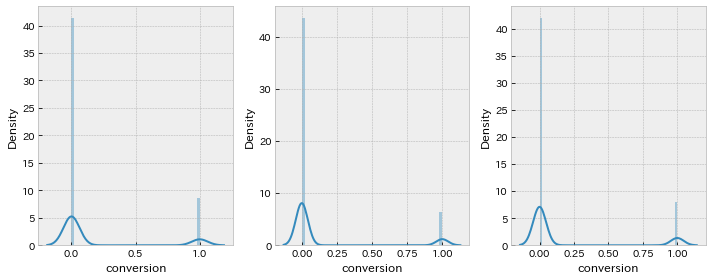

In [ ]:
# 分布の確認
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
sns.distplot(group7["conversion"])
plt.subplot(1, 3, 2)
sns.distplot(group8["conversion"])
plt.subplot(1, 3, 3)
sns.distplot(group9["conversion"])
plt.tight_layout()

In [ ]:
# コルモゴロフ・スミルノフ検定
stats.kstest(group7['conversion'],"norm")

KstestResult(statistic=0.5, pvalue=0.0, statistic_location=0, statistic_sign=-1)

In [ ]:
stats.kstest(group8['conversion'],"norm")

KstestResult(statistic=0.5, pvalue=0.0, statistic_location=0, statistic_sign=-1)

In [ ]:
stats.kstest(group9['conversion'],"norm")

KstestResult(statistic=0.5, pvalue=0.0, statistic_location=0, statistic_sign=-1)

・判定結果

p値が有意水準を下回ったため、「過去に購入した商品価値」と「各オファー」は正規分布である


今回はどちらのデータも正規分布を仮定できました。よって、パラメトリック検定を使用します。

また、今回は対応がないデータとして扱います。

よって、F検定（分散の検定）を行う。

①仮説立て

帰無仮説：すべての群に対し母分散が等しい

対立仮説：いずれかの母分散が異なる

②有意水準

今回は5％とする

③p値を調べる

In [ ]:
ftest(group7["conversion"], group8["conversion"])

F:        1.281732071569673
p-value:  1.5346205497472346e-44


In [ ]:
ftest(group7["conversion"], group9["conversion"])

F:        1.0616288497581077
p-value:  0.0008961880940971185


In [ ]:
ftest(group9["conversion"], group8["conversion"])

F:        1.207325961292137
p-value:  4.080707562372311e-56


・判定結果

group7 and group8 ->母分散が異なる

group7 and group9 ->母分散が異なる

group8 and group9 ->母分散が異なる


　① 仮説を立てる

仮説は以下のように立てます。

・帰無仮説（H0）: 2 群間の平均値に差がない（ μdiff=0μ1=μ2 ）

・対立仮説（H1）: 2 群間の平均値に差がある（ μdiff≠0μ1≠μ2 ）

上記のように、帰無仮説を H0 、対立仮説を H1 と表します。

　② 有意水準を決める

今回は有意水準を 5% とします。

　③ p 値を計算する

group4 and group5 ->母分散が異なるため、equal_var=False

group4 and group6 ->母分散が異なるため、equal_var=False

group5 and group6 ->母分散が異なるため、equal_var=False

上記全て正規分布

In [ ]:
stats.ttest_ind(group7["conversion"],group8["conversion"], equal_var=False)

Ttest_indResult(statistic=9.442618175747825, pvalue=4.3457888537214666e-21)

In [ ]:
stats.ttest_ind(group7["conversion"],group9["conversion"], equal_var=False)

Ttest_indResult(statistic=2.566007674486942, pvalue=0.010299602707725281)

In [ ]:
stats.ttest_ind(group9["conversion"],group8["conversion"], equal_var=False)

Ttest_indResult(statistic=10.92849322413718, pvalue=8.988049813336553e-28)

・判定結果

いずれのp値も有意水準を下回ったため、いずれも有意な差がある。

->つまり、channel次第でconvensionを向上できる。

#要因の分析

#・相関係数（相関分析の実装）

In [ ]:
df.corr()

,recency,history,used_discount,used_bogo,is_referral,conversion
recency,1.000000,-0.246591,-0.031336,-0.026617,-0.052106,-0.074765
history,-0.246591,1.000000,0.112677,0.114685,0.223279,0.065153
used_discount,-0.031336,0.112677,1.000000,-0.816943,0.020900,0.006712
used_bogo,-0.026617,0.114685,-0.816943,1.000000,0.021346,0.051999
is_referral,-0.052106,0.223279,0.020900,0.021346,1.000000,-0.073924
conversion,-0.074765,0.065153,0.006712,0.051999,-0.073924,1.000000


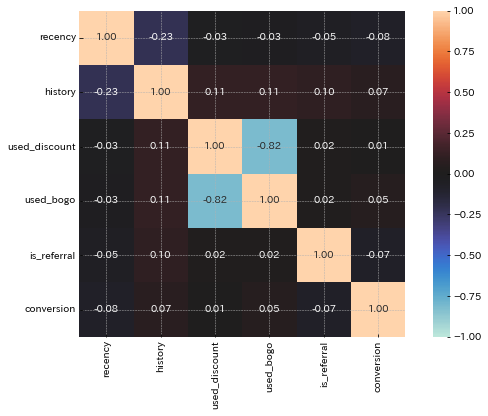

In [ ]:
# `conversion`との相関が高い変数を確認する  
sns.heatmap(df.corr(method='spearman'), annot=True, square=True, vmax=1, vmin=-1, center=0, fmt='.2f');

In [ ]:
df[["history","conversion"]].corr()

,history,conversion
history,1.000000,0.065153
conversion,0.065153,1.000000


In [ ]:
df[["recency","conversion"]].corr()

,recency,conversion
recency,1.000000,-0.074765
conversion,-0.074765,1.000000


上記より分かることとして、

・historyとconversionはあまり相関がない。

－＞historyをいじっても効果なし。

・recencyとconversionはあまり相関がない。

－＞recencyをいじっても効果無し。

※conversionの高いユーザーに対し、何かしても効果が見込めない。


無相関検定では以下のように仮説を立てて検定を行います。

帰無仮説 

：母相関係数は0である (同様の相関はない)

対立仮説

：母相関係数は0ではない

In [ ]:
#無相関検定
from scipy import stats
r, pvalue = stats.pearsonr(df['conversion'], df['history'])
print(f'相関係数：{r}')
print(f'p 値：{pvalue}')

相関係数：0.0651533593508418
p 値：3.677981177834781e-61


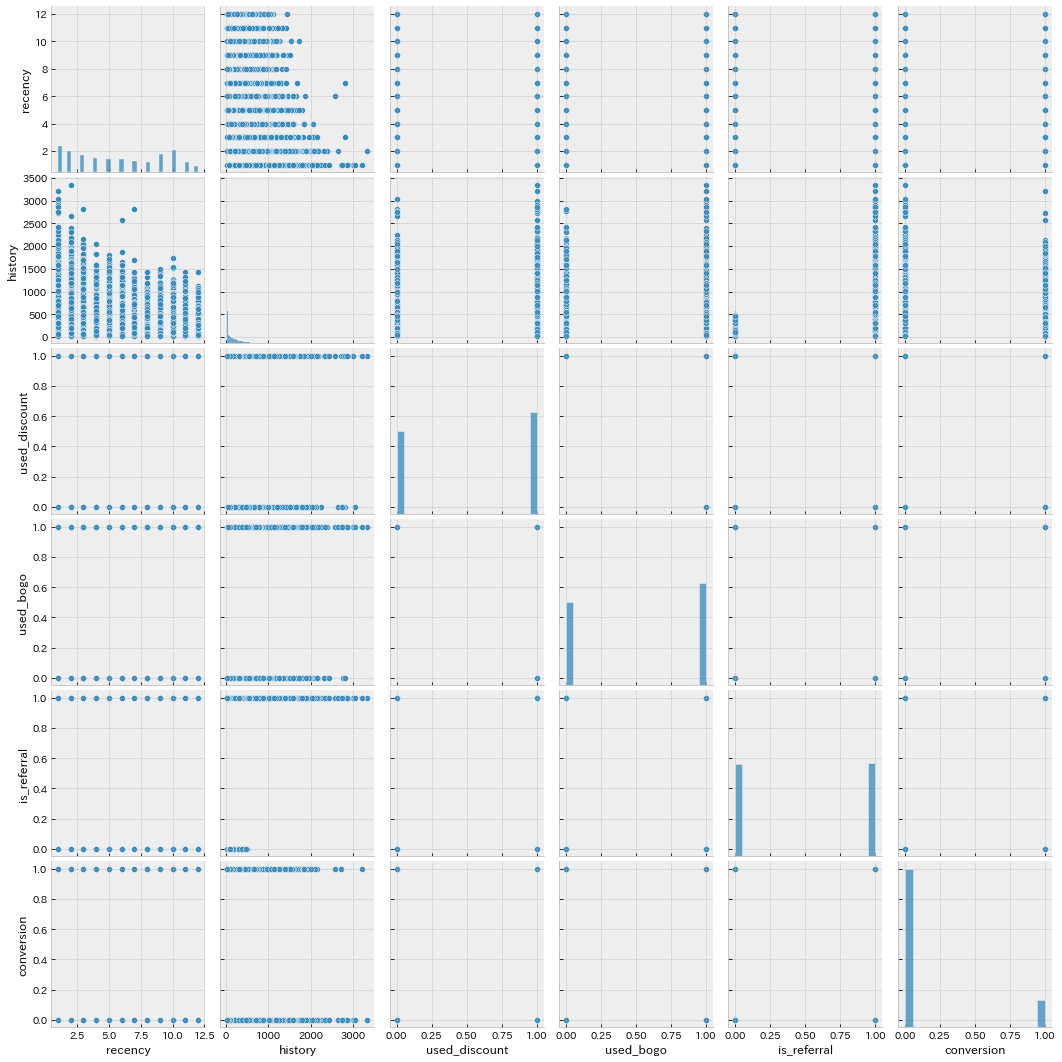

In [ ]:
sns.pairplot(df);

#・回帰分析

#仮説1：目的変数をconversionにしてみる

In [ ]:
# 変数の選択: 目的変数→conversion、入力変数→数値データ  

#数値データのみを取得
df.select_dtypes(include= "object")

#数値化 ･･･ one hot encording の場合
_df = pd.get_dummies(df)

#データの分割
x = _df.drop("conversion", axis=1)
y = _df["conversion"]

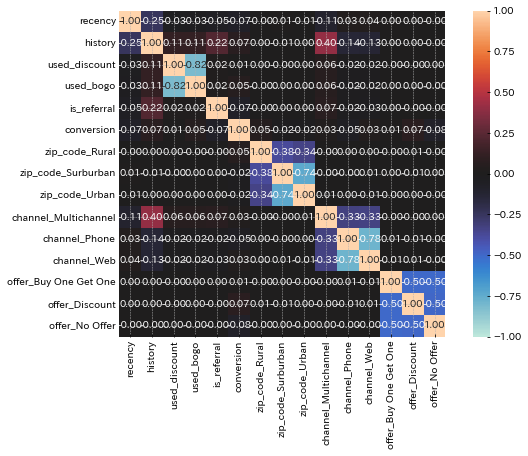

In [ ]:
sns.heatmap(_df.corr(), annot=True, square=True, vmax=1, vmin=-1, center=0, fmt='.2f');

上記より、

・used_discountとused_bogoが強い負の相関

・Multichannelとhistoryがやや正の相関

・offer_Discount,offer_bogo,offer_No offerがそれぞれやや負の相関

・zip_code_Urban, zip_code_Rural,zip_code_Surburbanがそれぞれ負の相関（特に、SurburbanとUrbanが強い負の相関）

・channel_Phoneとchannel_Webが負の相関

－＞「割引を使ったかbogoを使ったか」「電話からかウェブからか」という二者択一は避けるべき？

－＞「offer」「居住地」はそれぞれ別個に向けたプロモーションを打つべき（一緒くたにすべきでない）。

－＞「conversion」云々はどれも相関がクソほどないため、conversionの高いユーザーに限定したプロモーションは止めるべき。

In [ ]:
#標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#インスタンス化
x_scaled = scaler.fit_transform(x)

In [ ]:
#重回帰分析
feature = pd.DataFrame(x_scaled, columns=_df.drop("conversion", axis=1).columns)

np.random.seed(0)
multi_ols = sm.OLS(y, sm.add_constant(feature))
result = multi_ols.fit()

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             conversion   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     207.7
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:43:20   Log-Likelihood:                -23208.
No. Observations:               64000   AIC:                         4.644e+04
Df Residuals:                   63988   BIC:                         4.655e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1468      0.001    106.775      0.000       0.144       0.149
recency                  -0.0220      0.001    -15.540      0.000      -0.025      -0.019
history                   0.0145      0.002      8.706      0.000       0.011       0.018
used_discount             0.0442      0.003     17.268      0.000       0.039       0.049
used_bogo                 0.0530      0.003     20.703      0.000       0.048       0.058
is_referral              -0.0323      0.001    -22.860      0.000      -0.035      -0.029
zip_code_Rural            0.0135      0.001     12.332      0.000       0.011       0.016
zip_code_Surburban       -0.0044      0.001     -5.377      0.000      -0.006      -0.003
zip_code_Urban           -0.0053      0.001     -6.241      0.000      -0.007      -0.004
channel_Multichannel     -0.0018      0.001     -1.444      0.149      -0.004       0.001
channel_Phone            -0.0072      0.001     -8.582      0.000      -0.009      -0.006
channel_Web               0.0083      0.001     10.007      0.000       0.007       0.010
offer_Buy One Get One     0.0023      0.001      2.565      0.010       0.001       0.004
offer_Discount            0.0167      0.001     18.255      0.000       0.015       0.019
offer_No Offer           -0.0191      0.001    -20.820      0.000      -0.021      -0.017
==============================================================================
Omnibus:                    20397.703   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47287.860
Skew:                           1.892   Prob(JB):                         0.00
Kurtosis:                       4.849   Cond. No.                     7.29e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.19e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
#自由度調整済み決定係数
result.rsquared_adj

0.034301038563986586

#※決定係数が低いため、精度がクソ悪い。どうにかしてくれ

In [ ]:
#説明変数とt値・p値、標準編回帰係数のデータフレームを作成
res_values = pd.DataFrame([result.tvalues[1:], result.pvalues[1:], result.params[1:]],
             index = ["t", "p", "coef"]).T

In [ ]:
res_values

,t,p,coef
recency,-15.539503,2.356951e-54,-0.022044
history,8.706340,3.211528e-18,0.014495
used_discount,17.267692,1.167268e-66,0.044176
used_bogo,20.703281,6.633969e-95,0.052972
is_referral,-22.860347,3.346009e-115,-0.032253
zip_code_Rural,12.332145,6.662593e-35,0.013450
zip_code_Surburban,-5.377037,7.598622e-08,-0.004444
zip_code_Urban,-6.241217,4.368902e-10,-0.005273
channel_Multichannel,-1.443760,1.488114e-01,-0.001787
channel_Phone,-8.581673,9.555896e-18,-0.007166


In [ ]:
# 条件抽出
# t値の絶対値が2以上かつp値が5%以下
res_values[(res_values['t'].abs()>=2.0)&(res_values['p']<0.05)].sort_values('t', ascending=False)

,t,p,coef
used_bogo,20.703281,6.633969e-95,0.052972
offer_Discount,18.255100,2.911645e-74,0.016736
used_discount,17.267692,1.167268e-66,0.044176
zip_code_Rural,12.332145,6.662593e-35,0.013450
channel_Web,10.006692,1.482363e-23,0.008335
history,8.706340,3.211528e-18,0.014495
offer_Buy One Get One,2.564669,1.032970e-02,0.002349
zip_code_Surburban,-5.377037,7.598622e-08,-0.004444
zip_code_Urban,-6.241217,4.368902e-10,-0.005273
channel_Phone,-8.581673,9.555896e-18,-0.007166


上記3つのセルより、

・zip_code_Surburban, zip_code_Urban, channel_Phone, recency, offer_No Offer, is_referral は負の相関をもつ重要な変数

－＞ここら辺を下げるように企画すると（conversionが上昇するので）ヨシ！

・used_bogo, offer_discount, used_discount, zip_code_Rural,channel_Web, history, offer_Buy One Get One は正の相関をもつ重要な変数である。

－＞ここら辺を上げるように企画すると（conversionが上昇するので）ヨシ！

In [ ]:
# 相関関係と比較
tmp = df.corr()['conversion']
tmp[tmp.abs()>0.5].sort_values(ascending=False)

conversion    1.0
Name: conversion, dtype: float64

#仮説2：目的変数をrecencyにしてみる

In [ ]:
# 変数の選択: 目的変数→recency、入力変数→  それ以外

#数値データのみを取得
df.select_dtypes(include= "object")

#数値化 ･･･ one hot encording の場合
_df_r = pd.get_dummies(df)

#データの分割
x_r = _df_r.drop("recency", axis=1)
y_r = _df_r["recency"]

In [ ]:
#標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#インスタンス化
x_r_scaled = scaler.fit_transform(x_r)

In [ ]:
#重回帰分析
feature_r = pd.DataFrame(x_r_scaled, columns=_df.drop("recency", axis=1).columns)

np.random.seed(0)
multi_ols_r = sm.OLS(y_r, sm.add_constant(feature_r))
result_r = multi_ols_r.fit()

In [ ]:
result_r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                recency   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     401.0
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:43:20   Log-Likelihood:            -1.6899e+05
No. Observations:               64000   AIC:                         3.380e+05
Df Residuals:                   63988   BIC:                         3.381e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.7637      0.013    429.758      0.000       5.737       5.790
history                  -0.8417      0.016    -52.908      0.000      -0.873      -0.811
used_discount             0.0027      0.025      0.110      0.913      -0.046       0.052
used_bogo                 0.0178      0.025      0.712      0.476      -0.031       0.067
is_referral              -0.0092      0.014     -0.663      0.507      -0.036       0.018
conversion               -0.2117      0.014    -15.540      0.000      -0.238      -0.185
zip_code_Rural           -0.0019      0.011     -0.182      0.855      -0.023       0.019
zip_code_Surburban        0.0157      0.008      1.945      0.052      -0.000       0.031
zip_code_Urban           -0.0145      0.008     -1.759      0.079      -0.031       0.002
channel_Multichannel     -0.0198      0.012     -1.641      0.101      -0.043       0.004
channel_Phone            -0.0011      0.008     -0.137      0.891      -0.017       0.015
channel_Web               0.0141      0.008      1.739      0.082      -0.002       0.030
offer_Buy One Get One     0.0039      0.009      0.442      0.659      -0.014       0.021
offer_Discount            0.0159      0.009      1.778      0.075      -0.002       0.034
offer_No Offer           -0.0199      0.009     -2.217      0.027      -0.037      -0.002
==============================================================================
Omnibus:                    72958.843   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4128.677
Skew:                           0.109   Prob(JB):                         0.00
Kurtosis:                       1.775   Cond. No.                     1.04e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.08e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
#自由度調整済み決定係数
result_r.rsquared_adj

0.06433315715318788

In [ ]:
#説明変数とt値・p値、標準編回帰係数のデータフレームを作成
res_values_r = pd.DataFrame([result_r.tvalues[1:], result_r.pvalues[1:], result_r.params[1:]],
             index = ["t", "p", "coef"]).T

In [ ]:
res_values_r

,t,p,coef
history,-52.908474,0.000000e+00,-0.841682
used_discount,0.109626,9.127065e-01,0.002743
used_bogo,0.712107,4.764011e-01,0.017835
is_referral,-0.662823,5.074466e-01,-0.009161
conversion,-15.539503,2.356951e-54,-0.211697
zip_code_Rural,-0.182460,8.552220e-01,-0.001944
zip_code_Surburban,1.944532,5.183570e-02,0.015684
zip_code_Urban,-1.759387,7.851664e-02,-0.014506
channel_Multichannel,-1.641054,1.007910e-01,-0.019814
channel_Phone,-0.137169,8.908980e-01,-0.001118


In [ ]:
# 条件抽出
# t値の絶対値が2以上かつp値が5%以下
res_values_r[(res_values_r['t'].abs()>=2.0)&(res_values_r['p']<0.05)].sort_values('t', ascending=False)

,t,p,coef
offer_No Offer,-2.216769,2.664236e-02,-0.019894
conversion,-15.539503,2.356951e-54,-0.211697
history,-52.908474,0.000000e+00,-0.841682


In [ ]:
tmp_r = df.corr()['recency']
tmp_r[tmp_r.abs()>0.5].sort_values(ascending=False)

recency    1.0
Name: recency, dtype: float64

上記から、

・historyと強い負の相関を持つ

－＞過去に買った商品価値が低い場合、客足は遠のく（offer_No offerの減少→recencyの上昇）

・conversionと負の相関を持つ

－＞目的達成度が低いほど、買う頻度は減る

・offer_No Offerと負の相関を持つ

－＞何も特典をあげなかったら、買う頻度は減る（offer_No Offer の減少→recencyの上昇）

#仮説3：目的変数をhistoryにしてみる

※これが一番精度が高い。

In [ ]:
# 変数の選択: 目的変数→history、入力変数→  それ以外

#数値データのみを取得
df.select_dtypes(include= "object")

#数値化 ･･･ one hot encording の場合
_df_h = pd.get_dummies(df)

#データの分割
x_h = _df_h.drop("history", axis=1)
y_h = _df_h["history"]

In [ ]:
#標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#インスタンス化
x_h_scaled = scaler.fit_transform(x_h)

In [ ]:
#重回帰分析
feature_h = pd.DataFrame(x_h_scaled, columns=_df.drop("history", axis=1).columns)

np.random.seed(0)
multi_ols_h = sm.OLS(y_h, sm.add_constant(feature_h))
result_h = multi_ols_h.fit()

In [ ]:
result_h.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                history   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     2725.
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:43:20   Log-Likelihood:            -4.3345e+05
No. Observations:               64000   AIC:                         8.669e+05
Df Residuals:                   63988   BIC:                         8.670e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   242.0857      0.836    289.703      0.000     240.448     243.723
recency                 -44.7424      0.846    -52.908      0.000     -46.400     -43.085
used_discount           119.4219      1.486     80.390      0.000     116.510     122.334
used_bogo               119.8670      1.487     80.618      0.000     116.953     122.781
is_referral              44.6904      0.843     53.025      0.000      43.038      46.342
conversion                7.3996      0.850      8.706      0.000       5.734       9.065
zip_code_Rural            0.3451      0.664      0.520      0.603      -0.956       1.646
zip_code_Surburban       -0.2655      0.503     -0.528      0.597      -1.251       0.719
zip_code_Urban            0.0185      0.514      0.036      0.971      -0.988       1.025
channel_Multichannel     67.1254      0.704     95.354      0.000      65.746      68.505
channel_Phone           -22.3655      0.500    -44.722      0.000     -23.346     -21.385
channel_Web             -21.7875      0.499    -43.632      0.000     -22.766     -20.809
offer_Buy One Get One     0.4292      0.557      0.771      0.441      -0.662       1.521
offer_Discount           -0.0587      0.559     -0.105      0.916      -1.154       1.036
offer_No Offer           -0.3710      0.559     -0.663      0.507      -1.467       0.725
==============================================================================
Omnibus:                    35097.854   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           434449.017
Skew:                           2.390   Prob(JB):                         0.00
Kurtosis:                      14.835   Cond. No.                     6.27e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.97e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
#自由度調整済み決定係数
result_h.rsquared_adj

0.3189284214058049

In [ ]:
#説明変数とt値・p値、標準編回帰係数のデータフレームを作成
res_values_h = pd.DataFrame([result_h.tvalues[1:], result_h.pvalues[1:], result_h.params[1:]],
             index = ["t", "p", "coef"]).T

In [ ]:
res_values_h

,t,p,coef
recency,-52.908474,0.000000e+00,-44.742433
used_discount,80.389512,0.000000e+00,119.421934
used_bogo,80.618018,0.000000e+00,119.867014
is_referral,53.024573,0.000000e+00,44.690366
conversion,8.706340,3.211528e-18,7.399636
zip_code_Rural,0.519932,6.031128e-01,0.345121
zip_code_Surburban,-0.528368,5.972457e-01,-0.265537
zip_code_Urban,0.035970,9.713062e-01,0.018478
channel_Multichannel,95.353735,0.000000e+00,67.125369
channel_Phone,-44.721678,0.000000e+00,-22.365486


In [ ]:
# 条件抽出
# t値の絶対値が2以上かつp値が5%以下
res_values_h[(res_values_h['t'].abs()>=2.0)&(res_values_h['p']<0.05)].sort_values('t', ascending=False)

,t,p,coef
channel_Multichannel,95.353735,0.000000e+00,67.125369
used_bogo,80.618018,0.000000e+00,119.867014
used_discount,80.389512,0.000000e+00,119.421934
is_referral,53.024573,0.000000e+00,44.690366
conversion,8.706340,3.211528e-18,7.399636
channel_Web,-43.631889,0.000000e+00,-21.787541
channel_Phone,-44.721678,0.000000e+00,-22.365486
recency,-52.908474,0.000000e+00,-44.742433


In [ ]:
tmp_h = df.corr()['history']
tmp_h[tmp_h.abs()>0.5].sort_values(ascending=False)

history    1.0
Name: history, dtype: float64

上記より、

・channel_Multichannelと強い正の相関

－＞複数のアクセスチャンネルがあるほど、買ってくれる商品価値は高くなる

＝Web か Phone のどちらかだと負の相関

・used_bogo, used_discountと強い正の相関

－＞bogoもしくは割引を使ってくれた方が、買ってくれる商品価値は高くなる

・is_referralと正の相関

ー＞口コミなどできてくれた方が、買ってくれる商品価値は高くなる

・recencyと負の相関

－＞頻繁に購入する人ほど、買ってくれる商品価値は高くなる

##！ここの下記から始めてくれ！

（多変量解析の基礎Ⅱー主成分分析）

#係数比較

#主成分分析